Notes: In the provided dataset, there are three AEM (Airborne Electromagnetic) datasets: one in CSV format (Airborne Electromagnetic (AEM).csv) and two in shapefile format (Airborne Electromagnetic (AEM) and Geophysical Survey Datasets - Airborne Electromagnetic (AEM)). All three datasets will be explored in this notebook.

In [2]:
import pandas as pd
import geopandas as gpd

# Import CSV dataset
csv_file = "../../data/raw/Dataset/GA/Airborne_Electromagnetic/Airborne Electromagnetic (AEM).csv"
df_csv = pd.read_csv(csv_file, low_memory=False)

# Import shapefile datasets
shapefile_paths = ["../../data/raw/Dataset/GA/Airborne_Electromagnetic/Airborne Electromagnetic (AEM).shp", 
'../data/raw/Dataset/GA/Airborne_Electromagnetic/Geophysical Survey Datasets - Airborne Electromagnetic (AEM).shp']
gdf_aem = gpd.read_file(shapefile_paths[0])
gdf_aem_survey = gpd.read_file(shapefile_paths[1])



In [14]:
# Explore CSV dataset
pd.set_option('display.max_columns', None)
print("CSV Dataset:")
print(df_csv.head())
print(df_csv.columns)


CSV Dataset:
  POINT_NO         ESTIMATION_METHOD GA_PREFERRED STATE  LONG_GDA94   
0   682234  Airborne Electromagnetic            Y   QLD  140.149332  \
1   682235  Airborne Electromagnetic            Y   QLD  140.152736   
2   682236  Airborne Electromagnetic            Y   QLD  140.156407   
3   682237  Airborne Electromagnetic            Y   QLD  140.160313   
4   682238  Airborne Electromagnetic            Y   QLD  140.163815   

    LAT_GDA94 DEPTH_M DEPTH_CONFIDENCE     BOUNDARY_NAME  BOUNDARY_TYPE   
0  -19.353467   272.3              low  Base of Mesozoic  unconformable  \
1  -19.352135   272.4              low  Base of Mesozoic  unconformable   
2  -19.350854   272.3              low  Base of Mesozoic  unconformable   
3  -19.349391   271.1              low  Base of Mesozoic  unconformable   
4  -19.347998   272.1              low  Base of Mesozoic  unconformable   

  OVERAGE_ERA OVERLYING_STRAT_UNIT OVERLYING_STRAT_UNIT_NO   
0    Mesozoic  Rolling Downs Group             

In [7]:
print(df_csv['LONG_GDA94'].unique())
print(df_csv['LAT_GDA94'].unique())


['140.149332' '140.152736' '140.156407' ... '121.199626' '121.466778'
 '122.995014']
['-19.353467' '-19.352135' '-19.350854' ... '-21.296534' '-21.367111'
 '-21.956108']


In [8]:
df_csv = df_csv[pd.to_numeric(df_csv['LONG_GDA94'], errors='coerce').notnull()]
df_csv = df_csv[pd.to_numeric(df_csv['LAT_GDA94'], errors='coerce').notnull()]


In [9]:
df_csv['LONG_GDA94'] = df_csv['LONG_GDA94'].astype(float)
df_csv['LAT_GDA94'] = df_csv['LAT_GDA94'].astype(float)


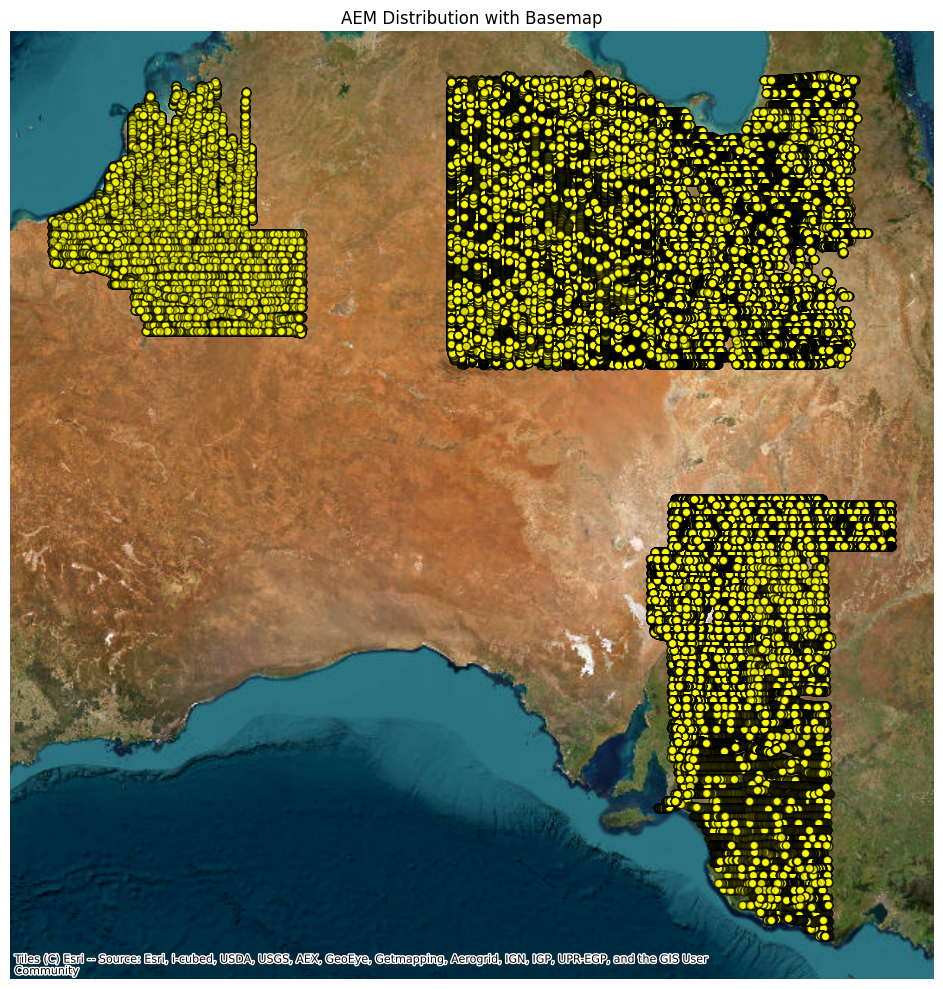

In [11]:
import geopandas as gpd
import matplotlib.pyplot as plt
import contextily as ctx
from shapely.geometry import Point

df_csv = df_csv.dropna(subset=['LONG_GDA94', 'LAT_GDA94'])  
geometry = [Point(xy) for xy in zip(df_csv['LONG_GDA94'], df_csv['LAT_GDA94'])]
gdf = gpd.GeoDataFrame(df_csv, geometry=geometry, crs='EPSG:4326')  

# Convert to Web Mercator
gdf_web = gdf.to_crs(epsg=3857)

fig, ax = plt.subplots(figsize=(10, 10))
gdf_web.plot(ax=ax, alpha=0.6, color='yellow', edgecolor='k')

ctx.add_basemap(ax, source=ctx.providers.Esri.WorldImagery)

ax.set_title('AEM Distribution with Basemap')
ax.set_axis_off()
plt.tight_layout()
plt.show()

In [13]:
# Explore shapefile datasets
print("\nShapefile Dataset 1:")
print(gdf_aem.head())


Shapefile Dataset 1:
   POINT_NO                ESTIMATION GA_PREFERR STATE  LONG_GDA94  LAT_GDA94   
0    682234  Airborne Electromagnetic          Y   QLD  140.149332 -19.353467  \
1    682235  Airborne Electromagnetic          Y   QLD  140.152736 -19.352135   
2    682236  Airborne Electromagnetic          Y   QLD  140.156407 -19.350854   
3    682237  Airborne Electromagnetic          Y   QLD  140.160313 -19.349391   
4    682238  Airborne Electromagnetic          Y   QLD  140.163815 -19.347998   

   DEPTH_M DEPTH_CONF        BOUNDARY_N     BOUNDARY_T OVERAGE_ER   
0    272.3        low  Base of Mesozoic  unconformable   Mesozoic  \
1    272.4        low  Base of Mesozoic  unconformable   Mesozoic   
2    272.3        low  Base of Mesozoic  unconformable   Mesozoic   
3    271.1        low  Base of Mesozoic  unconformable   Mesozoic   
4    272.1        low  Base of Mesozoic  unconformable   Mesozoic   

            OVERLYING_  OVERLYIN_1   
0  Rolling Downs Group     16267.0  \


In [20]:
gdf_aem.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 470400 entries, 0 to 470399
Data columns (total 42 columns):
 #   Column      Non-Null Count   Dtype   
---  ------      --------------   -----   
 0   POINT_NO    470400 non-null  int32   
 1   ESTIMATION  470400 non-null  object  
 2   GA_PREFERR  470400 non-null  object  
 3   STATE       470400 non-null  object  
 4   LONG_GDA94  470400 non-null  float64 
 5   LAT_GDA94   470400 non-null  float64 
 6   DEPTH_M     470400 non-null  float64 
 7   DEPTH_CONF  470400 non-null  object  
 8   BOUNDARY_N  461107 non-null  object  
 9   BOUNDARY_T  455482 non-null  object  
 10  OVERAGE_ER  454124 non-null  object  
 11  OVERLYING_  435153 non-null  object  
 12  OVERLYIN_1  435153 non-null  float64 
 13  OVERLYIN_2  435153 non-null  object  
 14  OVERLYIN_3  435250 non-null  object  
 15  UNDERAGE_E  454198 non-null  object  
 16  UNDERLYING  430968 non-null  object  
 17  UNDERLYI_1  430968 non-null  float64 
 18  UNDERLYI_2  4309

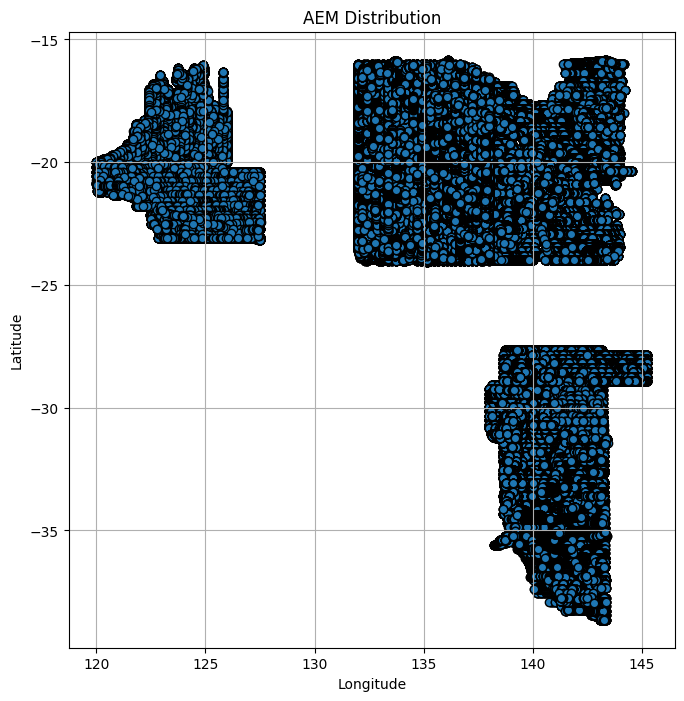

In [12]:
# Plot shapefile datasets
import matplotlib.pyplot as plt

gdf_aem.plot(figsize=(10, 8), edgecolor='k')
plt.title("AEM Distribution")
plt.xlabel("Longitude")
plt.ylabel("Latitude")
plt.grid(True)
plt.show()


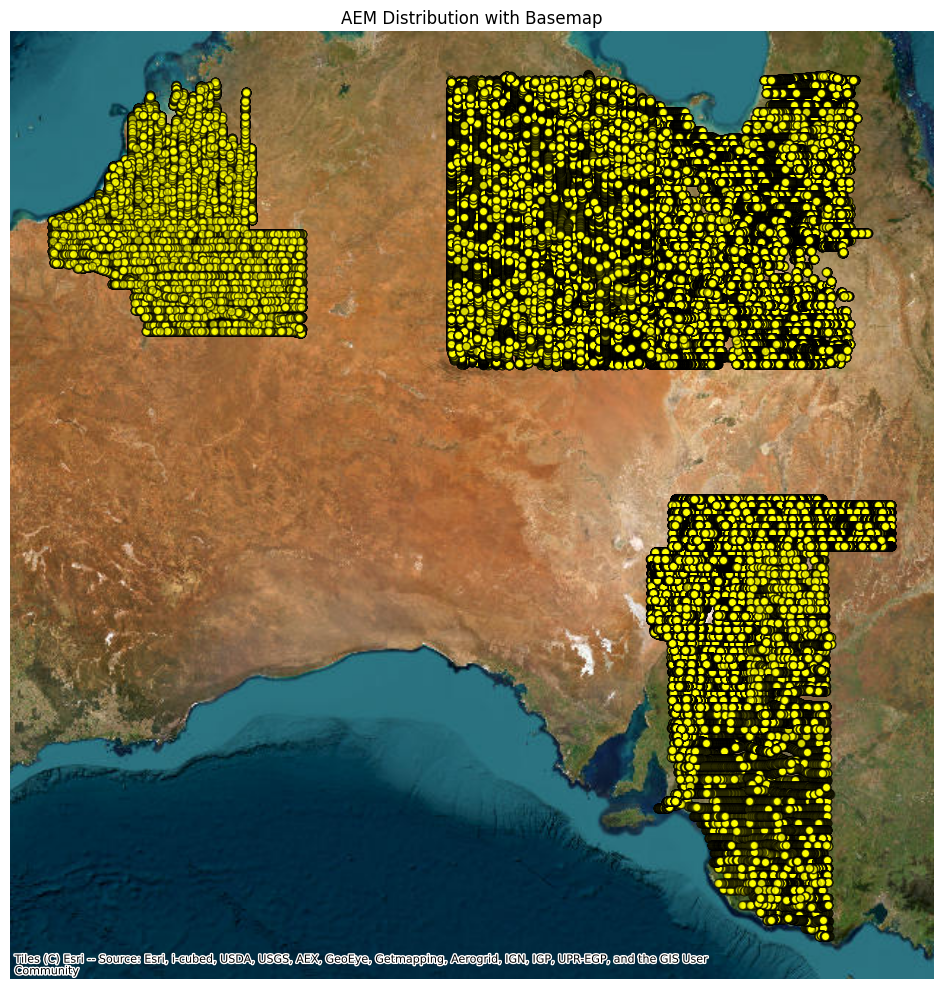

In [16]:
# Convert to Web Mercator
gdf_web = gdf_aem.to_crs(epsg=3857)

fig, ax = plt.subplots(figsize=(10, 10))
gdf_web.plot(ax=ax, alpha=0.6, color='yellow', edgecolor='k')

ctx.add_basemap(ax, source=ctx.providers.Esri.WorldImagery)

ax.set_title('AEM Distribution with Basemap')
ax.set_axis_off()
plt.tight_layout()
plt.show()

In [8]:

print("\nShapefile Dataset 2:")
print(gdf_aem_survey.head())



Shapefile Dataset 2:
          lowerCorne         upperCorne  DATASET_NO     ENO  SURVEY_ID   
0    -36.753 145.388   -36.4203 145.881        4176  228873        903  \
1    -36.753 145.388   -36.4203 145.881        4177  228873        903   
2  -35.8104 146.6141  -35.5231 147.0851        4180  228874        904   
3  -35.8104 146.6141  -35.5231 147.0851       12360  228874        904   
4  -35.8104 146.6141  -35.5231 147.0851        4181  228874        904   

                                   SURVEY_NAM       MEASURE_TY   
0  SMMSP - AEM - Honeysuckle Creek, Vic, 2001  electromagnetic  \
1  SMMSP - AEM - Honeysuckle Creek, Vic, 2001  electromagnetic   
2    SMMSP - AEM - Billabong Creek, NSW, 2001  electromagnetic   
3    SMMSP - AEM - Billabong Creek, NSW, 2001  electromagnetic   
4    SMMSP - AEM - Billabong Creek, NSW, 2001  electromagnetic   

                                  MEASURE_SU DATASET_TY NATIONAL_D  ...   
0  line data (no measurement type specified)       line      

In [19]:
gdf_aem_survey.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 61 entries, 0 to 60
Data columns (total 61 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   lowerCorne  61 non-null     object  
 1   upperCorne  61 non-null     object  
 2   DATASET_NO  61 non-null     int32   
 3   ENO         61 non-null     int32   
 4   SURVEY_ID   61 non-null     int32   
 5   SURVEY_NAM  61 non-null     object  
 6   MEASURE_TY  61 non-null     object  
 7   MEASURE_SU  61 non-null     object  
 8   DATASET_TY  61 non-null     object  
 9   NATIONAL_D  61 non-null     object  
 10  ARCHIVE_FI  61 non-null     object  
 11  ARCHIVE__1  61 non-null     object  
 12  ARCHIVE_LO  18 non-null     object  
 13  ARCHIVE_TY  18 non-null     object  
 14  FILE_SIZE   18 non-null     object  
 15  COUNTRY     61 non-null     object  
 16  STATE       60 non-null     object  
 17  ONSHORE_OF  61 non-null     object  
 18  SURVEY_TYP  61 non-null     object  
 19  SU

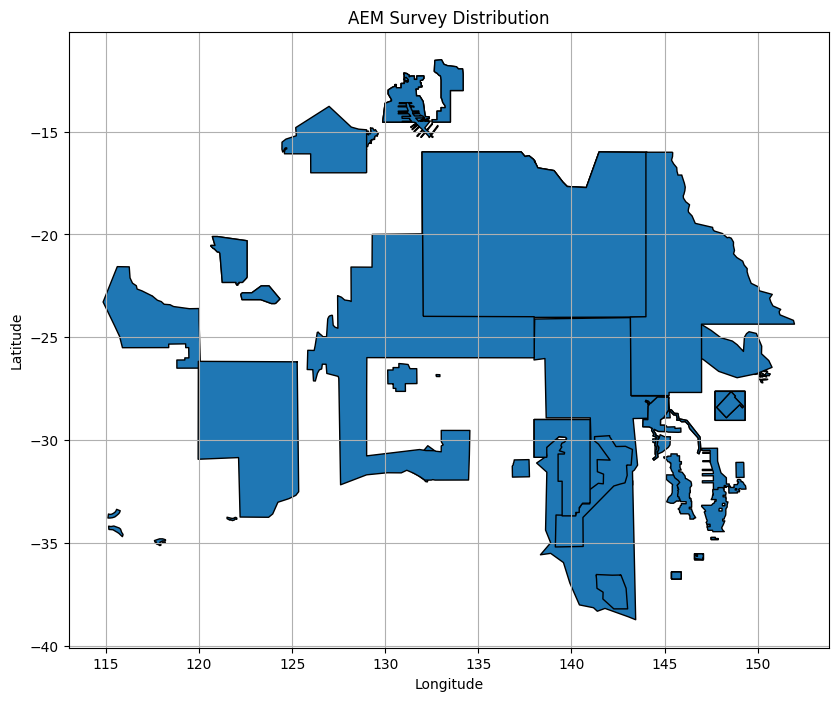

In [13]:
# Plot shapefile datasets
import matplotlib.pyplot as plt

gdf_aem_survey.plot(figsize=(10, 8), edgecolor='k')
plt.title("AEM Survey Distribution")
plt.xlabel("Longitude")
plt.ylabel("Latitude")
plt.grid(True)
plt.show()

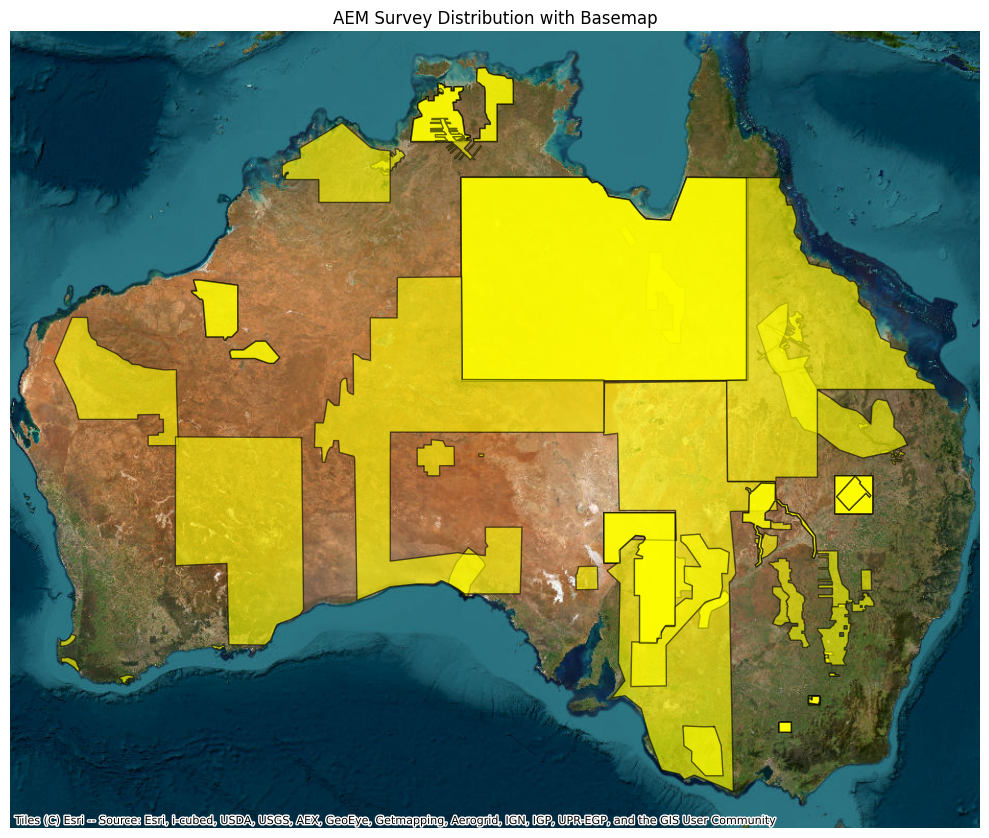

In [18]:
# Convert to Web Mercator
gdf_web = gdf_aem_survey.to_crs(epsg=3857)

fig, ax = plt.subplots(figsize=(10, 10))
gdf_web.plot(ax=ax, alpha=0.6, color='yellow', edgecolor='k')

ctx.add_basemap(ax, source=ctx.providers.Esri.WorldImagery)

ax.set_title('AEM Survey Distribution with Basemap')
ax.set_axis_off()
plt.tight_layout()
plt.show()